# TẠO BẢN ĐỒ GIÁ NHÀ VỚI PYTHON

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint
pd.set_option('display.max_columns', 4)

In [ ]:
!pip install pandas geopandas matplotlib contextily shapely

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load the dataset
Ames = pd.read_csv('../data/Ames.csv')

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(Ames['Longitude'], Ames['Latitude'])]
geo_df = gpd.GeoDataFrame(Ames, geometry=geometry)
print(geo_df)

            PID  GrLivArea  ...  Longitude                    geometry
0     909176150        856  ... -93.651619  POINT (-93.65162 42.01856)
1     905476230       1049  ... -93.663671  POINT (-93.66367 42.02486)
2     911128020       1001  ... -93.614068  POINT (-93.61407 42.02155)
3     535377150       1039  ... -93.612207  POINT (-93.61221 42.03739)
4     534177230       1665  ... -93.631818  POINT (-93.63182 42.04455)
...         ...        ...  ...        ...                         ...
2574  903205040        952  ... -93.626373   POINT (-93.62637 42.0321)
2575  905402060       1733  ... -93.666138  POINT (-93.66614 42.02767)
2576  909275030       2002  ...        NaN                 POINT EMPTY
2577  907192040       1842  ... -93.689748   POINT (-93.68975 42.0168)
2578  906223180       1911  ... -93.682220    POINT (-93.68222 42.031)

[2579 rows x 86 columns]


In [6]:
geo_df.crs = "EPSG:4326"  # Hệ WGS84 dùng cho GPS

In [9]:
# Tạo hình bao ngoài cho toàn bộ điểm nhà
convex_hull = geo_df.unary_union.convex_hull

# Chuyển hình đó thành GeoSeries để hiển thị
convex_hull_geo = gpd.GeoSeries(convex_hull, crs="EPSG:4326")

# Đổi CRS sang EPSG:3857 để tính toán khoảng cách mét
convex_hull_transformed = convex_hull_geo.to_crs(epsg=3857)

# Thêm vùng đệm 500m xung quanh ranh giới Ames
buffered_hull = convex_hull_transformed.buffer(500)

C:\Users\pc\AppData\Local\Temp\ipykernel_18428\285817365.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  convex_hull = geo_df.unary_union.convex_hull


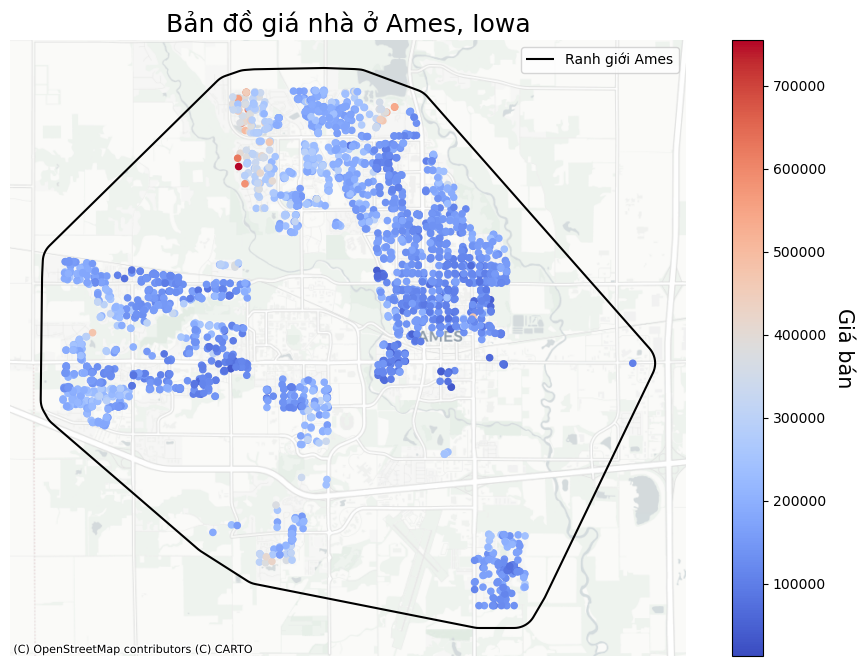

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

fig, ax = plt.subplots(figsize=(12, 8))

# Chuyển GeoDataFrame sang hệ toạ độ EPSG:3857 để vẽ bản đồ nền
geo_df.to_crs(epsg=3857).plot(
    column='SalePrice',              # Cột thể hiện bằng màu sắc
    cmap='coolwarm',                # Dải màu xanh-đỏ
    ax=ax,
    legend=True,
    markersize=20                   # Cỡ điểm biểu diễn căn nhà
)

# Vẽ ranh giới vùng bao quanh Ames
buffered_hull.boundary.plot(ax=ax, color='black', label='Ranh giới Ames')

# Thêm bản đồ nền từ OpenStreetMap (qua contextily)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Tắt trục tọa độ và thêm các chi tiết phụ
ax.set_axis_off()
ax.legend(loc='upper right')
colorbar = ax.get_figure().get_axes()[1]
colorbar.set_ylabel('Giá bán', rotation=270, labelpad=20, fontsize=15)
plt.title('Bản đồ giá nhà ở Ames, Iowa', fontsize=18)
plt.show()

## Kết thúc